In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

## Given
$$
    \left\{
    \begin{array}\\
    y = 4 t ^ 2 + 1 \\
    x = 3 t
    \end{array}
    \right.
$$
## Solution
There I use coordinate method.
All plots are available below, I want to thank my mom, dad and say hello to my math teacher, I hope, she wouldn't cry, at least not so much as my english teacher R.I.P. my A for TM course.

In [3]:
# Choose the step for dt
dt = 0.2

In [4]:
# There we define all we need to find trajectory
t_array = np.arange(-5, 5, dt)

x_array = 3 * t_array
y_array = 4 * t_array ** 2 + 1

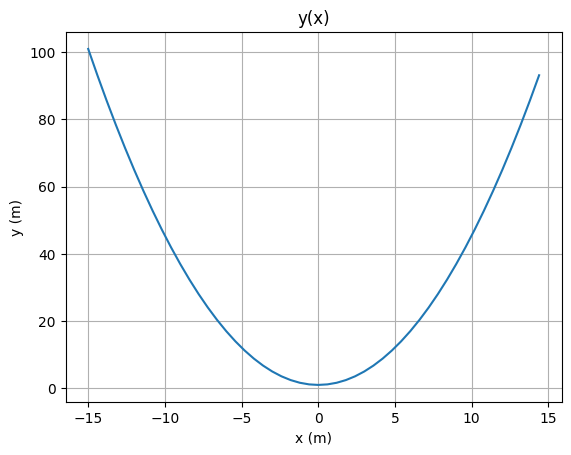

In [5]:
# Trajectory plot

fig, ax = plt.subplots()
ax.plot(x_array, y_array)

ax.set(xlabel='x (m)', ylabel='y (m)',
       title='y(x)')
ax.grid()
plt.show()  # Show the plot



$$     \vec{V} = \frac {d x \vec{i} + dy \vec{j}}{dt} \\
       \vec{V} = 3 \vec{i} + 8t \vec{j}
$$
Using the formula $|\vec{v}| = \sqrt{v_x^2 + v_y^2}$ we can calculate speed of the particle.

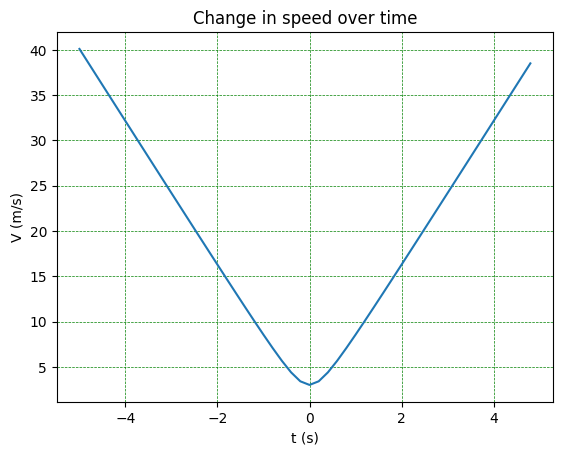

In [6]:
# v_array - array of magnitude of the velocities
v_array = np.sqrt(3 ** 2 + (8 * t_array) ** 2)

# v_matrix - array of vectors of the velocities
v_matrix = np.array([(3, 8 * t) for t in t_array])

# tau - tangent vector to the trajectory of the point
tau = np.empty(shape=v_matrix.shape)

# just little iterator
i = 0

for v in v_matrix:
    tau[i] = v / np.linalg.norm(v)
    i = i + 1
# plot the magnitude of the velocities
fig, ax = plt.subplots()
ax.plot(t_array, v_array)

ax.set(xlabel='t (s)', ylabel='V (m/s)',
       title='Change in speed over time')
ax.grid(color='green', linestyle='--', linewidth=0.5)
plt.show()  # Show the plot

$$\vec{a} = \vec{a_n} + \vec{a_\tau}$$$$\vec{a} = \frac{dV}{dt} = \frac{3\vec{i} + 8t\vec{j}}{dt} = 8\vec{j}$$

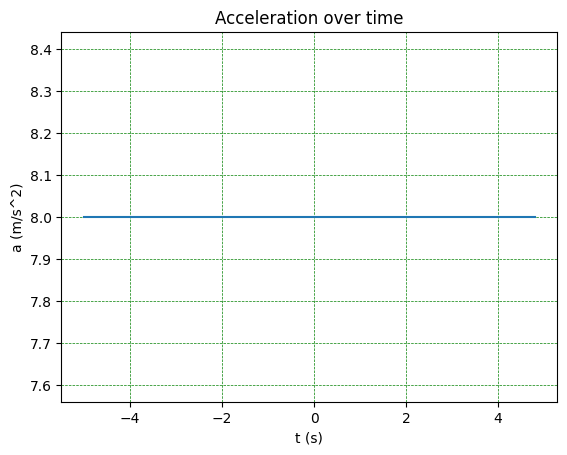

In [7]:
# a_module array - array of the acceleration magnitude
a_module_array = np.array(t_array)
a_module_array.fill(8)
fig, ax = plt.subplots()
ax.plot(t_array, a_module_array)

ax.set(xlabel='t (s)', ylabel='a (m/s^2)',
       title='Acceleration over time')
ax.grid(color='green', linestyle='--', linewidth=0.5)
plt.show()  # Show the plot

In [8]:
# Do not make a fly from elephant or opposite
# The acceleration is constant, never-mind
a_matrix = np.array([(0, 8) for t in t_array])

The formula is used below to find tangent acceleration
$$\vec{a^\tau} = \frac{|\vec{a}\cdot \vec{v}|}{|\vec{V}|}*\vec{\tau}$$

The best way to find normal acceleration is to use the formula
$$\vec{a^n} = \frac{|\vec{a}\times \vec{V}|}{\vec{V}|}*\vec{n}$$
But the biggest question is: how to find $\vec{n}$? Easy! Find cross product of $\vec{k} = \{0,0,1\}$ and velocity, but I'm lazy to rewrite my beautiful arrays.
Therefore, to make clear if there any problems with $\vec{a^\tau}$, I used formula $\vec{a^n} = \vec{a} - \vec{a^\tau}$

In [9]:
# array of tangent acceleration
a_t_matrix = np.empty(shape=a_matrix.shape)
for i in range(0, t_array.size):
    dot = np.dot(a_matrix[i], v_matrix[i])
    norm = np.linalg.norm(v_matrix[i])
    new_a_t = dot / norm
    # print(cross, norm, new_a_t)
    a_t_matrix[i] = np.multiply(new_a_t, tau[i])

In [10]:
a_n_matrix = np.empty(shape=a_matrix.shape)

for i in range(0, t_array.size):
    #The hard way to find normal acceleration
    new_a_n = np.cross(a_matrix[i], v_matrix[i]) / np.linalg.norm(v_matrix[i])
    # The easiest way (mine) to find normal acceleration
    a_n_matrix[i] = a_matrix[i] - a_t_matrix[i]

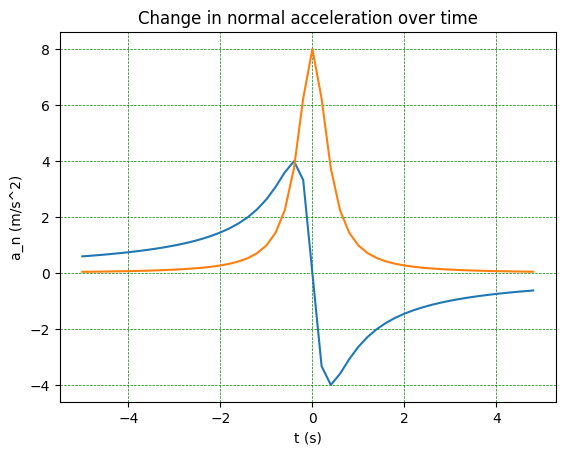

In [11]:
fig, ax = plt.subplots()
ax.plot(t_array, a_n_matrix)

ax.set(xlabel='t (s)', ylabel='a_n (m/s^2)',
       title='Change in normal acceleration over time')
ax.grid(color='green', linestyle='--', linewidth=0.5)
plt.show()  # Show the plot

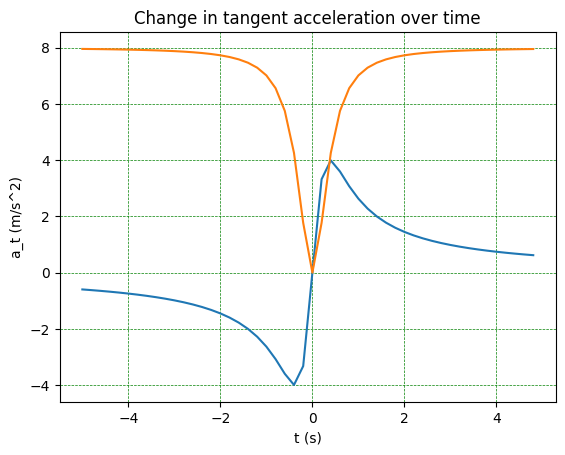

In [12]:
fig, ax = plt.subplots()
ax.plot(t_array, a_t_matrix)

ax.set(xlabel='t (s)', ylabel='a_t (m/s^2)',
       title='Change in tangent acceleration over time')
ax.grid(color='green', linestyle='--', linewidth=0.5)
plt.show()  # Show the plot

$$\vec{a} = \ddot {\sigma}\tau + \dot{\sigma}^2 k \vec{n} = \vec{a_\tau} + \vec{a_n}$$
$$\vec{a_n} = \dot{\sigma}^2 k \vec{n} = |\vec{v}|^2k\vec{n}$$


$$ k= \frac{|a_n|}{|\vec{v}|^2}$$

In [13]:
k_array = np.empty(shape=t_array.shape)

for i in range(0, t_array.size):
    k_array[i] = np.linalg.norm(a_n_matrix[i]) / np.linalg.norm(v_array[i])

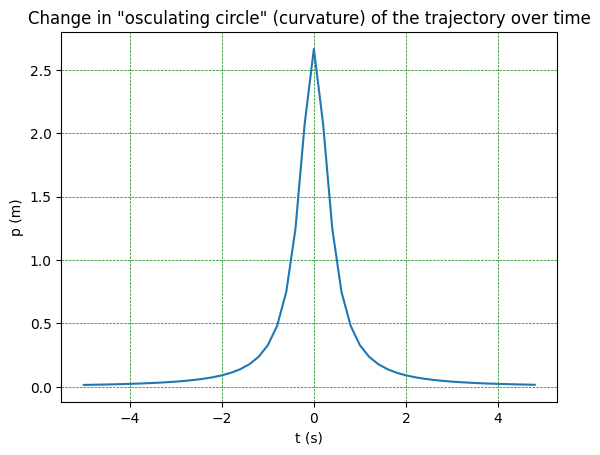

In [14]:
fig, ax = plt.subplots()
ax.plot(t_array, k_array)

ax.set(xlabel='t (s)', ylabel='p (m)',
       title='Change in "osculating circle" (curvature) of the trajectory over time')
ax.grid(color='green', linestyle='--', linewidth=0.5)
plt.show()  # Show the plot

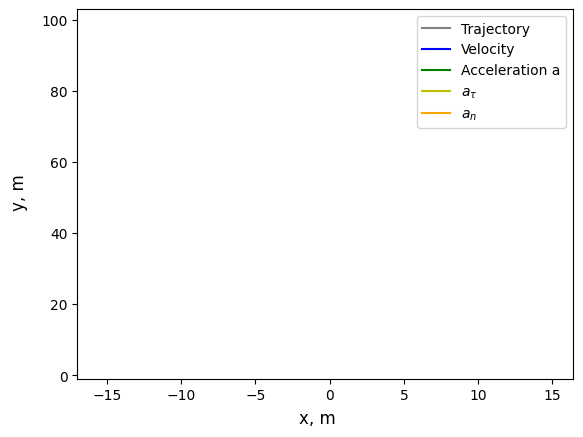

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'gray', label="Trajectory")
v_ln, = plt.plot([], [], 'b', label="Velocity")
a_ln, = plt.plot([], [], 'g', label="Acceleration a")
a_t_ln, = plt.plot([], [], 'y', label="$a_{\\tau}$")
a_n_ln, = plt.plot([], [], 'orange', label="$a_{n}$")
ax.legend()


def init():
    ax.set_xlim(min(x_array) - 2, max(x_array) + 2)
    ax.set_ylim(min(y_array) - 2, max(y_array) + 2)
    return ln, v_ln, a_ln, a_t_ln, a_n_ln


def draw_velocity(frame):
    v_ln.set_data([v_matrix[frame][0] + xdata[frame], xdata[frame]],
                  [v_matrix[frame][1] + ydata[frame], ydata[frame]])


def draw_acc(frame):
    a_ln.set_data([a_matrix[frame][0] + xdata[frame], xdata[frame]],
                  [a_matrix[frame][1] + ydata[frame], ydata[frame]])


def draw_acc_t(frame):
    a_t_ln.set_data([a_t_matrix[frame][0] + xdata[frame], xdata[frame]],
                    [a_t_matrix[frame][1] + ydata[frame], ydata[frame]])


def draw_acc_n(frame):
    a_n_ln.set_data([a_n_matrix[frame][0] + xdata[frame], xdata[frame]],
                    [a_n_matrix[frame][1] + ydata[frame], ydata[frame]])


def update(frame):
    xdata.append(x_array[frame])
    ydata.append(y_array[frame])
    ln.set_data(xdata, ydata)
    draw_velocity(frame)
    draw_acc(frame)
    draw_acc_t(frame)
    draw_acc_n(frame)
    return ln, v_ln, a_ln, a_t_ln, a_n_ln


fig.supxlabel("x, m")
fig.supylabel("y, m")
ani = FuncAnimation(fig, update, frames=np.arange(0, t_array.size, 1),
                    init_func=init, interval=200, blit=True)
plt.show()

from IPython.display import HTML

ani.save("ani.gif")
ani.save("ani.mp4")
HTML(ani.to_html5_video())